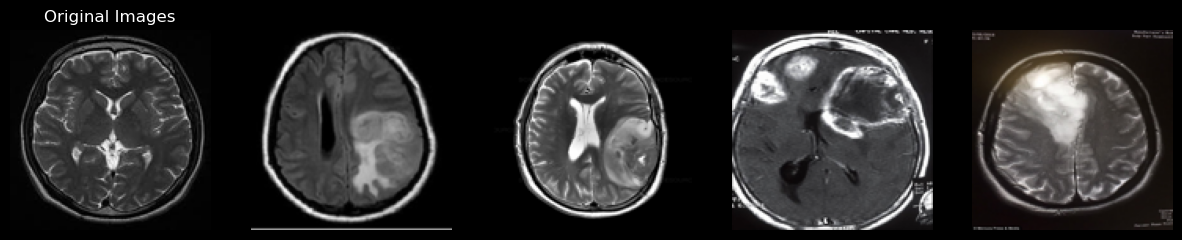

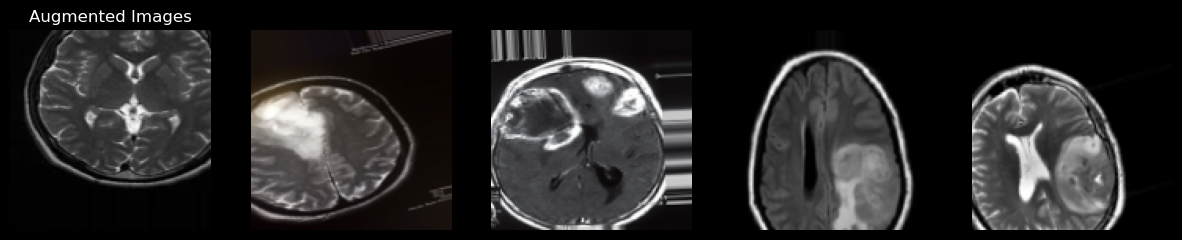



Epoch 1/30


3/3 [==============================] - 26s 6s/step - loss: 1.0758 - accuracy: 0.5586 - val_loss: 0.9142 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 18s 6s/step - loss: 0.8295 - accuracy: 0.6126 - val_loss: 1.1012 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 15s 5s/step - loss: 0.8505 - accuracy: 0.6036 - val_loss: 0.8392 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 14s 5s/step - loss: 0.6254 - accuracy: 0.7387 - val_loss: 0.7107 - val_accuracy: 0.5357
Epoch 5/30
3/3 [==============================] - 15s 5s/step - loss: 0.6924 - accuracy: 0.6667 - val_loss: 0.6907 - val_accuracy: 0.6429
Epoch 6/30
3/3 [==============================] - 13s 4s/step - loss: 0.6686 - accuracy: 0.7387 - val_loss: 0.7632 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 13s 4s/step - loss: 0.6947 - accuracy: 0.6486 - val_loss: 0.8449 - val_accuracy: 0.5000
Epoch 8/30
3/3 [==============

In [1]:
# import
import os
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, GlobalAveragePooling2D, Dropout, Dense, MaxPooling2D
from keras.optimizers import Adamax
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# Data loading and preprocessing...

data = []
paths = []
result = []

for r, d, f in os.walk(r"C:\Users\Ramachandra\OneDrive\Desktop\madhu madam\yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
            
# This cell updates result list for images without tumor

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"C:\Users\Ramachandra\OneDrive\Desktop\madhu madam\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
        
data = np.array(data)
data.shape
result = np.array(result)
result = result.reshape(139,2)

x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)


# Display some original images

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(array_to_img(x_train[i]))
    axes[i].axis('off')
axes[0].set_title('Original Images')
plt.show()

# Data augmentation using ImageDataGenerator with horizontal flip

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Display some augmented images

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for batch in datagen.flow(x_train[:5], batch_size=5):
    for i in range(5):
        axes[i].imshow(array_to_img(batch[i]))
        axes[i].axis('off')
    break
axes[0].set_title('Augmented Images')
plt.show()

# Model definition

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu', padding='Same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='Same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Model compilation
model.compile(loss="categorical_crossentropy", optimizer=Adamax(), metrics=['accuracy'])


# Model training
history = model.fit(datagen.flow(x_train, y_train, batch_size=40), epochs=30, validation_data=(x_test, y_test))
